**IMPORTING ESSENTIAL LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option("display.max.columns", None) 
pd.set_option("display.precision", 2)

**DATASET LOADING**

In [5]:
df = pd.read_csv('drug_consumption.csv')
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.50,0.48,-0.06,0.96,0.13,0.31,-0.58,-0.58,-0.92,-6.65e-03,-0.22,-1.18,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.08,-0.48,1.98,0.96,-0.32,-0.68,1.94,1.44,0.76,-1.43e-01,-0.71,-0.22,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.50,-0.48,-0.06,0.96,-0.32,-0.47,0.81,-0.85,-1.62,-1.01e+00,-1.38,0.40,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95,0.48,1.16,0.96,-0.32,-0.15,-0.81,-0.02,0.59,5.85e-01,-1.38,-1.18,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.50,0.48,1.98,0.96,-0.32,0.74,-1.63,-0.45,-0.30,1.31e+00,-0.22,-0.22,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95,0.48,-0.61,-0.57,-0.32,-1.19,1.74,1.89,0.76,-1.14e+00,0.88,1.92,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95,-0.48,-0.61,-0.57,-0.32,-0.25,1.74,0.58,0.76,-1.52e+00,0.88,0.77,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.08,0.48,0.45,-0.57,-0.32,1.13,-1.38,-1.28,-1.77,-1.39e+00,0.53,-0.53,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95,0.48,-0.61,-0.57,-0.32,0.91,-1.92,0.29,-1.62,-2.57e+00,1.29,1.22,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


**INITIAL DATA EXPLORATION**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [7]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.50,0.48,-0.06,0.96,0.13,0.31,-0.58,-0.58,-0.92,-6.65e-03,-0.22,-1.18,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.08,-0.48,1.98,0.96,-0.32,-0.68,1.94,1.44,0.76,-1.43e-01,-0.71,-0.22,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.50,-0.48,-0.06,0.96,-0.32,-0.47,0.81,-0.85,-1.62,-1.01e+00,-1.38,0.40,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95,0.48,1.16,0.96,-0.32,-0.15,-0.81,-0.02,0.59,5.85e-01,-1.38,-1.18,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.50,0.48,1.98,0.96,-0.32,0.74,-1.63,-0.45,-0.30,1.31e+00,-0.22,-0.22,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [8]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.00,1885.00,1.88e+03,1.88e+03,1885.00,1885.00,1.88e+03,1.88e+03,1.88e+03,1.88e+03,1.88e+03,1.88e+03,1.88e+03
mean,945.29,0.03,-2.56e-04,-3.81e-03,0.36,-0.31,4.66e-05,-1.63e-04,-5.34e-04,-2.45e-04,-3.86e-04,7.22e-03,-3.29e-03
std,545.17,0.88,4.83e-01,9.50e-01,0.70,0.17,9.98e-01,9.97e-01,9.96e-01,9.97e-01,9.98e-01,9.54e-01,9.64e-01
min,1.00,-0.95,-4.82e-01,-2.44e+00,-0.57,-1.11,-3.46e+00,-3.27e+00,-3.27e+00,-3.46e+00,-3.46e+00,-2.56e+00,-2.08e+00
25%,474.00,-0.95,-4.82e-01,-6.11e-01,-0.57,-0.32,-6.78e-01,-6.95e-01,-7.17e-01,-6.06e-01,-6.53e-01,-7.11e-01,-5.26e-01
50%,946.00,-0.08,-4.82e-01,-5.92e-02,0.96,-0.32,4.26e-02,3.32e-03,-1.93e-02,-1.73e-02,-6.65e-03,-2.17e-01,7.99e-02
75%,1417.00,0.50,4.82e-01,4.55e-01,0.96,-0.32,6.30e-01,6.38e-01,7.23e-01,7.61e-01,5.85e-01,5.30e-01,7.65e-01
max,1888.00,2.59,4.82e-01,1.98e+00,0.96,1.91,3.27e+00,3.27e+00,2.90e+00,3.46e+00,3.46e+00,2.90e+00,1.92e+00


In [9]:
shape = df.shape
print("Number of features: {} ".format(shape[1]))
print("Number of records: {}".format(shape[0]))

Number of features: 32 
Number of records: 1885


**DETECTING DUPLICATE VALUES(ALL VALUES MUST BE UNIQUE)**

In [10]:
print(df.duplicated().value_counts())

False    1885
Name: count, dtype: int64


In [11]:
df.drop_duplicates()
df = df.drop_duplicates()

In [12]:
print(df.duplicated().value_counts())

False    1885
Name: count, dtype: int64


**CHECK FOR MISSING VALUES(WHICH CAN CAUSE ERRORS)**

In [13]:
df.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

**RENAME AND SEGMENT COLUMNS AND VALUES FOR USABILITY AND CLARITY**

In [14]:
df.drop("ID", axis=1, inplace=True)
psych_score_cols = ['Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensationness']
demographic_cols = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
drug_usage_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

age_col = {
        -0.95197: '18-24',
        -0.07854: '25 - 34',
        0.49788: '35 - 44',
        1.09449: '45 - 54',
        1.82213: '55 - 64',
        2.59171: '65+'
        }
df['Age'] = df['Age'].replace(age_col)

gender_col = {
            0.48246: 'Female',
            -0.48246: 'Male'
            }
df['Gender'] = df['Gender'].replace(gender_col)

education_col = {
            -2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College,No Certificate Or Degree',
            -0.05921: 'Professional Certificate/ Diploma',
            0.45468: 'University Degree',
            1.16365: 'Masters Degree',
            1.98437: 'Doctorate Degree',
            }
df['Education'] = df['Education'].replace(education_col)
df['Education'] = pd.Categorical(df['Education'], ['Left School Before 16 years',
                            'Left School at 16 years',
                            'Left School at 17 years',
                            'Left School at 18 years',
                            'Some College,No Certificate Or Degree',
                            'Professional Certificate/ Diploma',
                            'University Degree',
                            'Masters Degree',
                            'Doctorate Degree'
                            ])

country_col = {
            -0.09765: 'Australia',
            0.24923: 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128: 'Republic of Ireland',
            0.96082: 'UK',
            -0.57009: 'USA'
            }
df['Country'] = df['Country'].replace(country_col)

ethnicity_col = {
            -0.50212: 'Asian',
            -1.10702: 'Black',
            1.90725: 'Mixed-Black/Asian',
            0.12600: 'Mixed-White/Asian',
            -0.22166: 'Mixed-White/Black',
            0.11440: 'Other',
            -0.31685: 'White'
            }
df['Ethnicity'] = df['Ethnicity'].replace(ethnicity_col)

for d in drug_usage_cols:
    df[d].replace({
        "CL0": "Never", 
        "CL1": "Over 10Y", 
        "CL2": "Last 10Y", 
        "CL3": "Last 1Y", 
        "CL4": "Last 1M", 
        "CL5": "Last 1W", 
        "CL6": "Last 1D"
    }, inplace=True)

df.rename(columns={
    'Nscore': 'Neuroticism', 
    'Escore': 'Extraversion', 
    'Oscore': 'Openness',
    'Ascore': 'Agreeableness',
    'Cscore':'Conscientiousness',
    'Impulsive':'Impulsiveness',
    'SS': 'Sensationness'
}, inplace=True)

**CHECKING THE UPDATED COLUMNS**

In [15]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensationness,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31,-0.58,-0.58,-0.92,-6.65e-03,-0.22,-1.18,Last 1W,Last 10Y,Never,Last 10Y,Last 1D,Never,Last 1W,Never,Never,Never,Never,Never,Never,Never,Never,Never,Last 10Y,Never,Never
1,25 - 34,Male,Doctorate Degree,UK,White,-0.68,1.94,1.44,0.76,-1.43e-01,-0.71,-0.22,Last 1W,Last 10Y,Last 10Y,Never,Last 1D,Last 1M,Last 1D,Last 1Y,Never,Last 1M,Never,Last 10Y,Never,Last 10Y,Last 1Y,Never,Last 1M,Never,Never
2,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.47,0.81,-0.85,-1.62,-1.01e+00,-1.38,0.40,Last 1D,Never,Never,Never,Last 1D,Last 1Y,Last 1M,Never,Never,Never,Never,Never,Never,Never,Never,Over 10Y,Never,Never,Never
3,18-24,Female,Masters Degree,UK,White,-0.15,-0.81,-0.02,0.59,5.85e-01,-1.38,-1.18,Last 1M,Never,Never,Last 1Y,Last 1W,Last 10Y,Last 1M,Last 10Y,Never,Never,Never,Last 10Y,Never,Never,Never,Never,Last 10Y,Never,Never
4,35 - 44,Female,Doctorate Degree,UK,White,0.74,-1.63,-0.45,-0.30,1.31e+00,-0.22,-0.22,Last 1M,Over 10Y,Over 10Y,Never,Last 1D,Last 1Y,Last 1D,Never,Never,Over 10Y,Never,Never,Over 10Y,Never,Never,Last 10Y,Last 10Y,Never,Never


**DATA UNDERSTANDING**

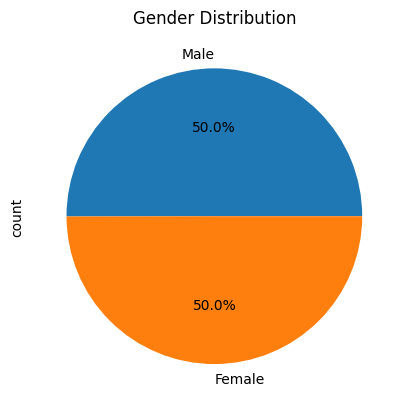

<Figure size 640x480 with 0 Axes>

In [16]:
#GENDER DISTRIBUTION PIE-CHART
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()
plt.clf()

**There is an even number of male and female participants.**

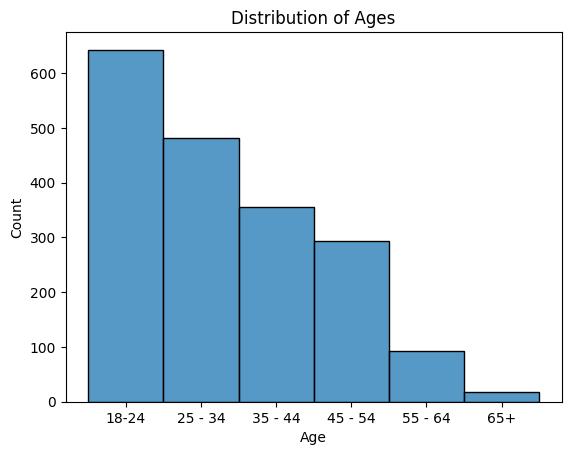

<Figure size 640x480 with 0 Axes>

In [17]:
#HISTOGRAM OF AGES
df.sort_values(['Age'], inplace=True)
sns.histplot(x='Age', data=df)
plt.title('Distribution of Ages')
plt.show()
plt.clf()

In [18]:
#AGE PERCENTAGES
age_distribution = df['Age'].value_counts(normalize=True) * 100
print("Percentage distribution of each category in the 'Age' column:")
print(age_distribution)

Percentage distribution of each category in the 'Age' column:
Age
18-24      34.11
25 - 34    25.52
35 - 44    18.89
45 - 54    15.60
55 - 64     4.93
65+         0.95
Name: proportion, dtype: float64


**The majority of participants are <34 years old, constituting 59.63% of the total. Additionally, a significant portion of participants, 34.49%, fall into the 35-54 range.**

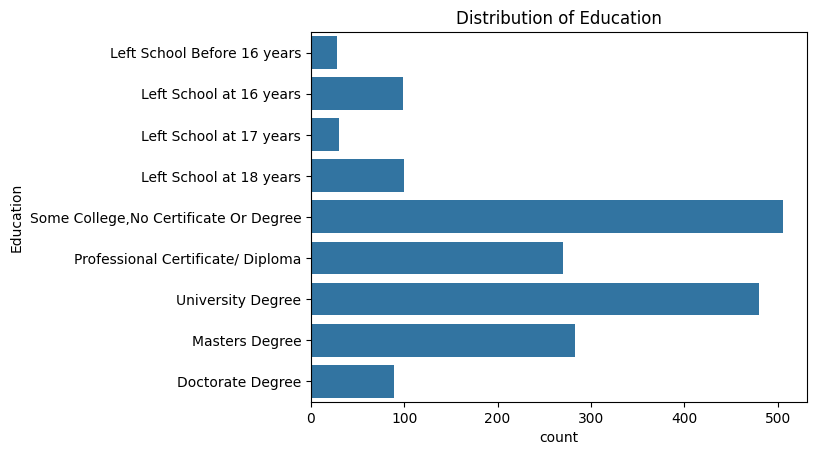

<Figure size 640x480 with 0 Axes>

In [19]:
#HISTOGRAM OF EDUCATION
df.sort_values(['Education'], inplace=True)
sns.countplot(y='Education', data=df)
plt.title('Distribution of Education')
plt.show()
plt.clf()

In [20]:
#EDUCATION PERCENTAGES
age_distribution = df['Education'].value_counts(normalize=True) * 100
print("Percentage distribution of each category in the 'Education' column:")
print(age_distribution)

Percentage distribution of each category in the 'Education' column:
Education
Some College,No Certificate Or Degree    26.84
University Degree                        25.46
Masters Degree                           15.01
Professional Certificate/ Diploma        14.32
Left School at 18 years                   5.31
Left School at 16 years                   5.25
Doctorate Degree                          4.72
Left School at 17 years                   1.59
Left School Before 16 years               1.49
Name: proportion, dtype: float64


**The majority of participants have at least some post grade school education constituting 71.64% of participants.**

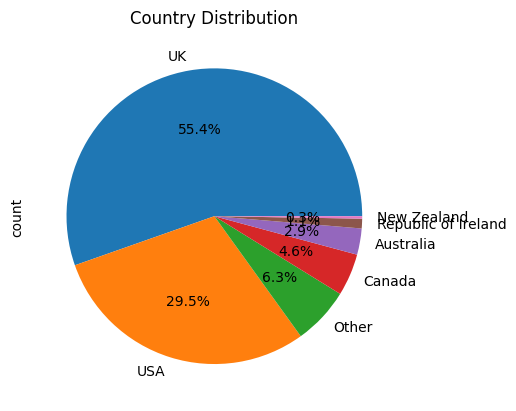

<Figure size 640x480 with 0 Axes>

In [21]:
#COUNTRY DISTRIBUTION 
df['Country'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Country Distribution')
plt.show()
plt.clf()

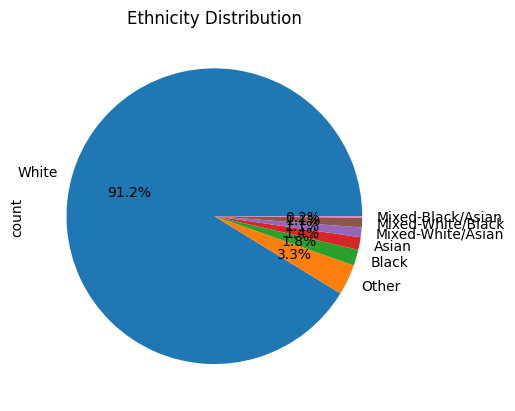

<Figure size 640x480 with 0 Axes>

In [22]:
# ETHINCITY DISTRIBUTION 
df['Ethnicity'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Ethnicity Distribution')
plt.show()
plt.clf()

**From this study we get to know that whites indulge with drugs more than any of the other ethincities.**

**PSYCHOLOGICAL SCORES**

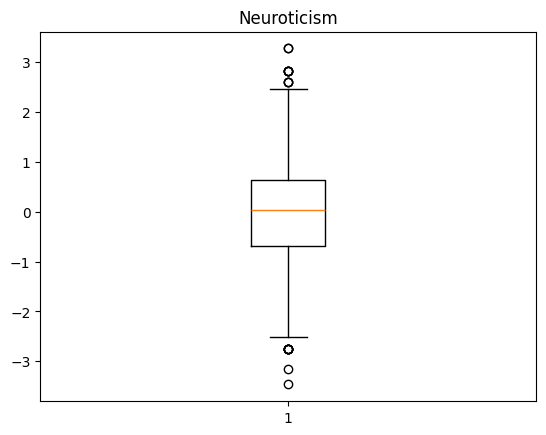

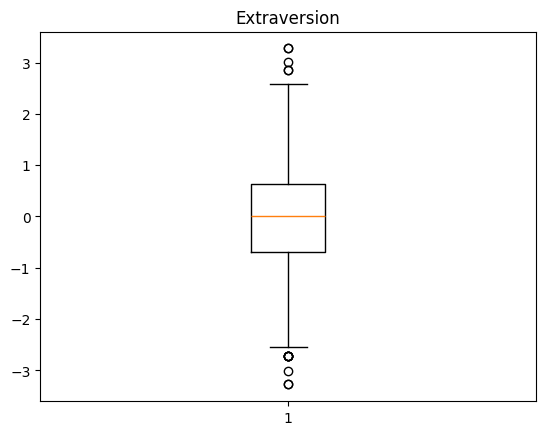

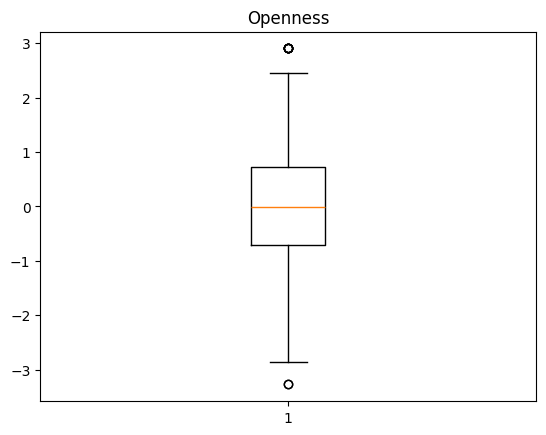

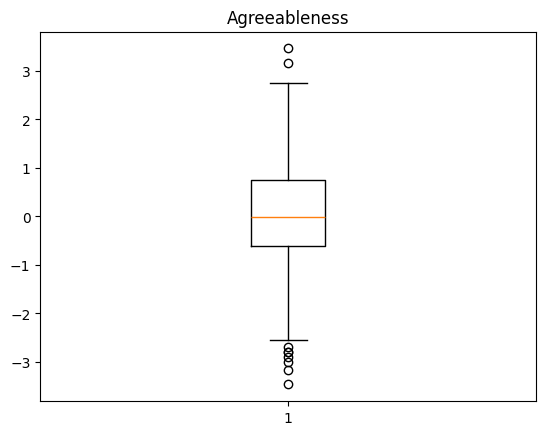

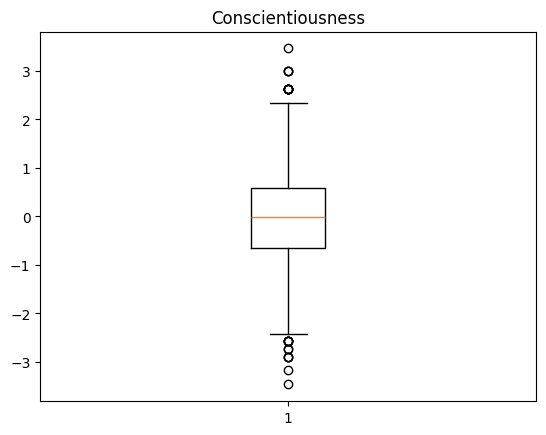

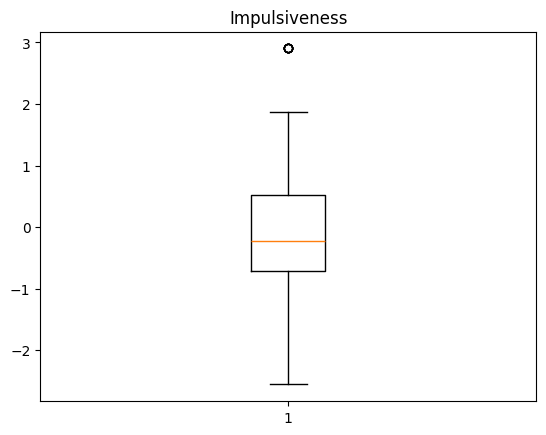

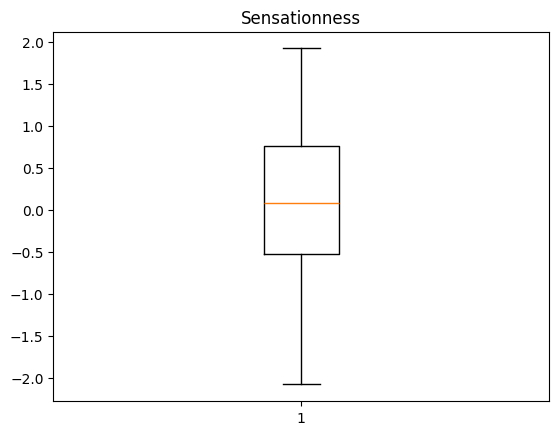

In [23]:
psych_score_cols=['Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensationness']

for col in psych_score_cols:
        plt.figure()
        plt.title(col)
        plt.boxplot(df[col])

**PREDICTION MODEL OF SUBSTANCE USE PATTERN OF HEROIN USING BAGGING CLASSIFIER**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [5]:
import pandas as pd

df = pd.DataFrame()

df = pd.read_csv("drug_consumption.csv")

In [6]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [17]:

features = df[['Age', 'Gender', 'Education', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]
target = df['Heroin']  #Predicting alcohol use pattern

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [19]:
model = BaggingClassifier()
model.fit(X_train, y_train)

BaggingClassifier()

In [20]:
predictions = model.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8488063660477454

Classification Report:
              precision    recall  f1-score   support

         CL0       0.86      0.99      0.92       324
         CL1       0.00      0.00      0.00        11
         CL2       0.00      0.00      0.00        18
         CL3       0.00      0.00      0.00        12
         CL4       0.00      0.00      0.00         6
         CL5       0.00      0.00      0.00         4
         CL6       0.00      0.00      0.00         2

    accuracy                           0.85       377
   macro avg       0.12      0.14      0.13       377
weighted avg       0.74      0.85      0.79       377



c:\Users\AA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**---------------------------------------------------------------------------------------------------------------------------**